In [1]:
import pandas as pd
import os


In [8]:
# Let's say you have your 10 datasets in a list or a folder
# Replace with actual file paths or use glob to read all CSVs from a folder
# removed kamal mudra as wrong dataset

In [2]:
file_paths = ["/Users/kartikraj/Desktop/EEG project files/Kartik/Kartik Chandra Mudra 7 june 5,20 pm 11 mins.csv",
             "/Users/kartikraj/Desktop/EEG project files/Kartik/Kartik Kanishtha mudra 7 june 5pm 11 mins.csv",
             "/Users/kartikraj/Desktop/EEG project files/Kartik/Kartik Kamal mudra 7june 6,40pm 11mins.csv",
             "/Users/kartikraj/Desktop/EEG project files/Kartik/Kartik Mrigi mudra 10june 8pm (1).csv",
             "/Users/kartikraj/Desktop/EEG project files/Kartik/Kartik Mushthi mudra 10 june 7 30 pm (1).csv",
             "/Users/kartikraj/Desktop/EEG project files/Kartik/kartik Prana mudra 10jun3 6,30pm (1).csv",
             "/Users/kartikraj/Desktop/EEG project files/Kartik/Kartik Saamana mudra 10june 6pm (1).csv",
             "/Users/kartikraj/Desktop/EEG project files/Kartik/Kartik Yoni Mudra 7June 19,18 11mins.csv",
             "/Users/kartikraj/Desktop/EEG project files/Kartik/kartik_pranammudra_05june-1pm-11mins.csv",
             "/Users/kartikraj/Desktop/EEG project files/Kartik/kartik_vajramudra_18;59_7june.csv",]

In [3]:
dataframes = []


In [4]:
for label, file_path in enumerate(file_paths):
    df = pd.read_csv(file_path)
    
    #dropping the data frames with Unnamed value columns
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    
    df['label'] = label
    dataframes.append(df)

In [5]:
final_df = pd.concat(dataframes, ignore_index=True)

In [6]:
print(final_df.head())
print(final_df.shape)

   Counter  Channel1  Channel2  Channel3  label
0      132 -0.006355  0.007076 -0.005532      0
1      133  0.005500  0.001964 -0.002671      0
2      134  0.013204  0.001348  0.001666      0
3      135  0.012575 -0.000566  0.004872      0
4      136  0.004676 -0.002999  0.006438      0
(3327500, 5)


In [7]:
%pip install pyod
import os
import numpy as np
from pyod.models import hbos
from pyod.utils.data import evaluate_print
from sklearn.metrics import confusion_matrix,cohen_kappa_score,f1_score
from scipy import signal
import matplotlib.pyplot as plt
import pickle
import pandas as pd

Note: you may need to restart the kernel to use updated packages.


In [8]:
#####
# Trial or epoch = eeg segment
#####

channels = 3
seconds = 0.5    # Size of each segment we want
fs = 256.0         # Dtaset eeg sampling rate
data_portion = 1
save_model = False


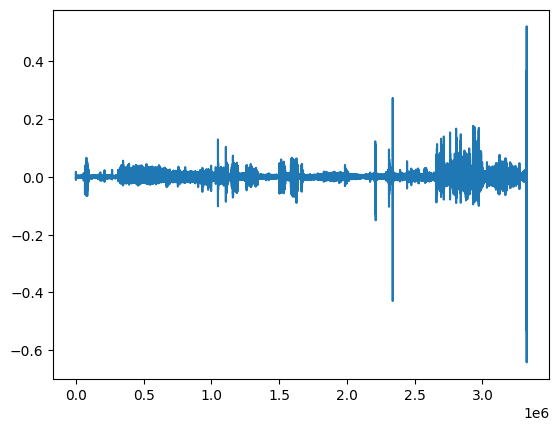

In [9]:
plt.plot(final_df['Channel1'])
#EMG data right hand

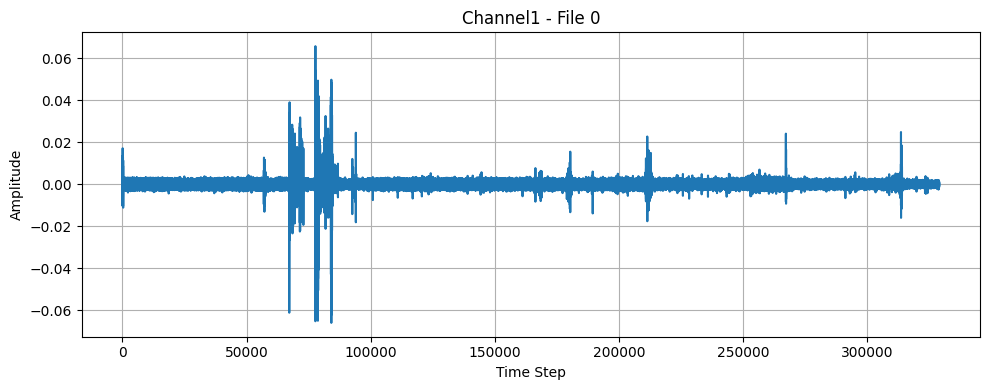

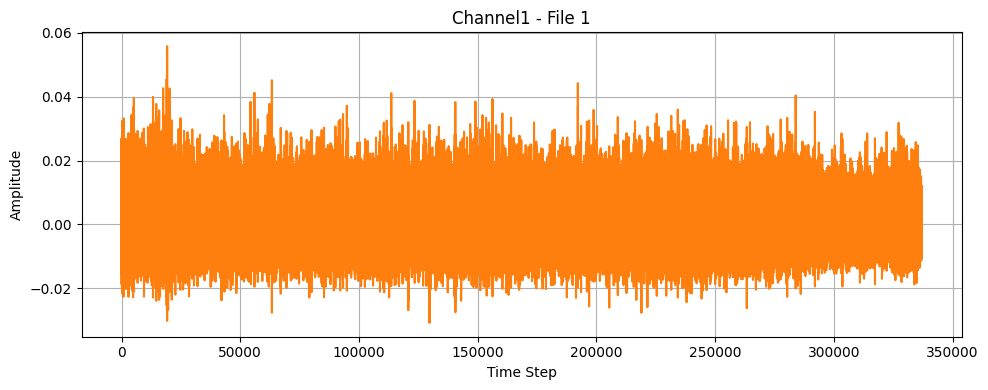

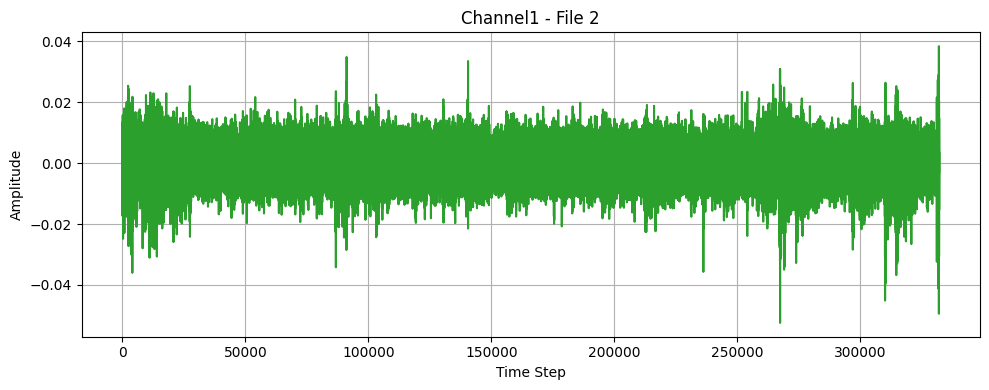

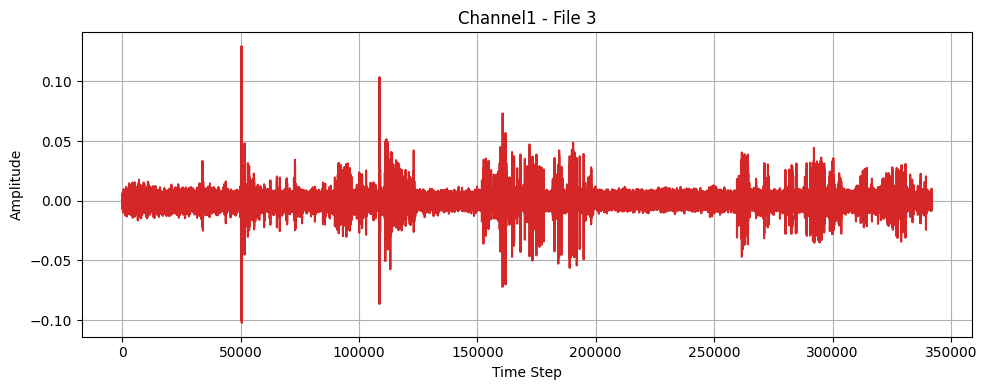

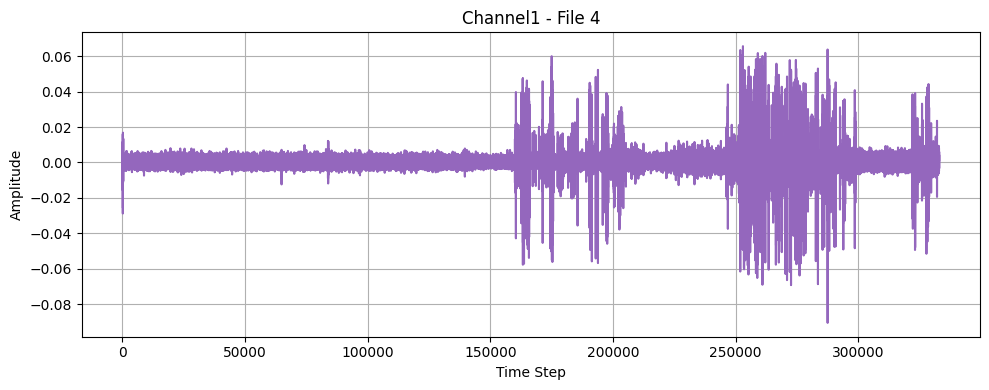

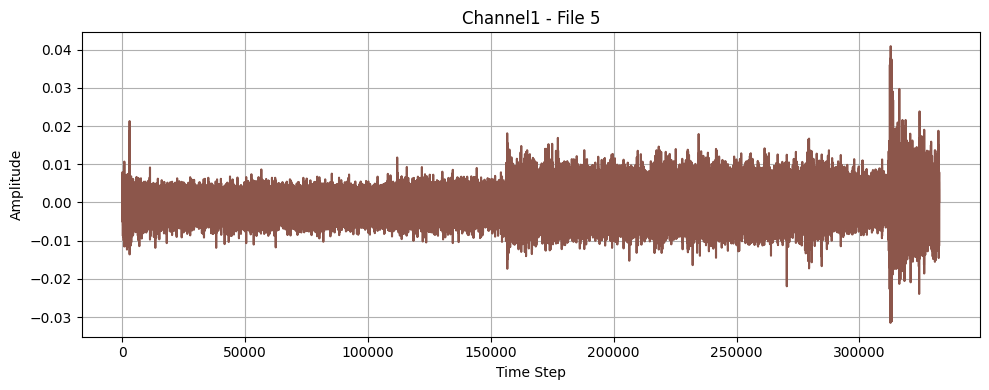

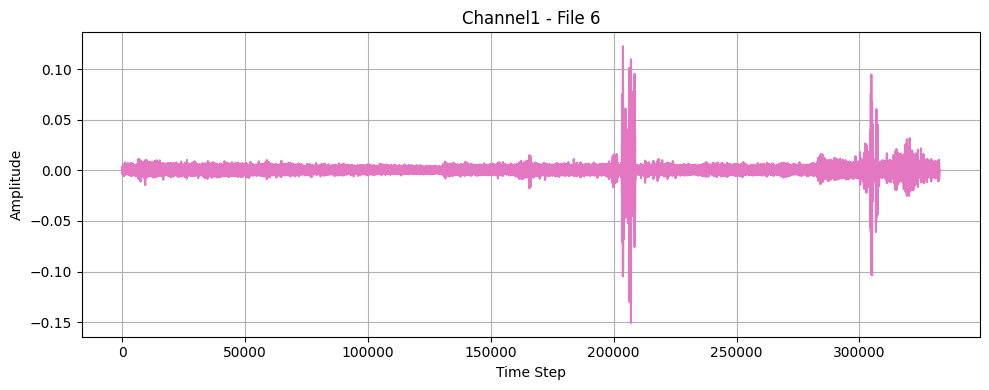

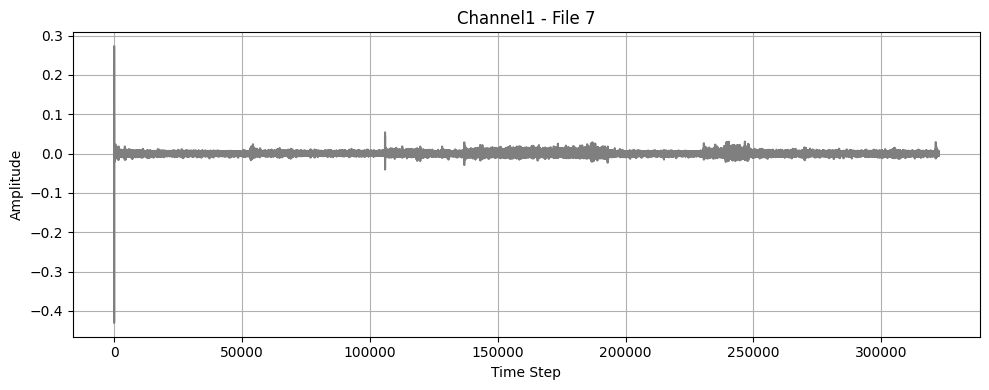

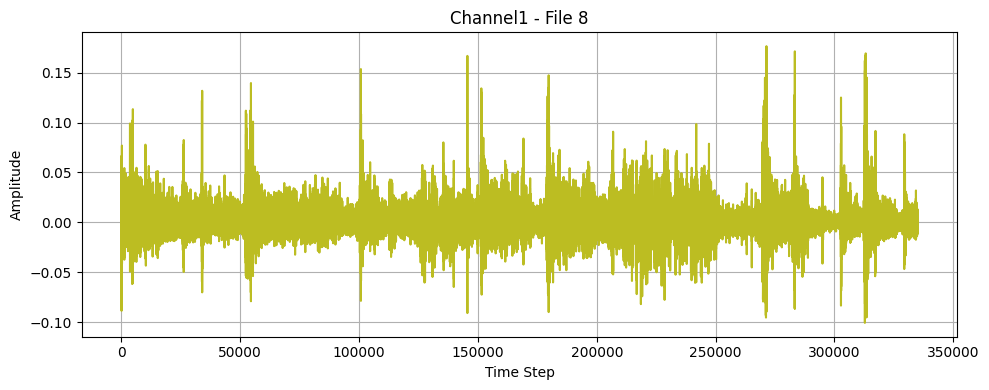

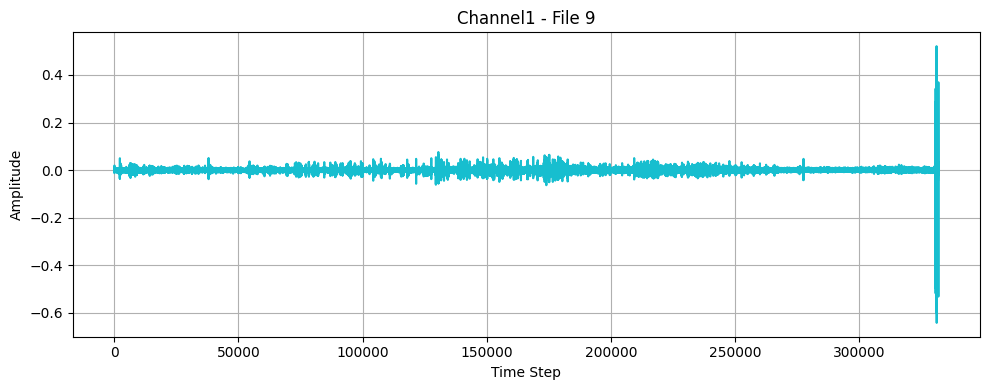

In [10]:
import matplotlib.cm as cm

colors = cm.tab10(np.linspace(0, 1, len(dataframes)))

for idx, (df, color) in enumerate(zip(dataframes, colors)):
    plt.figure(figsize=(10, 4))
    plt.plot(df['Channel1'], color=color)
    plt.title(f'Channel1 - File {idx}')
    plt.xlabel('Time Step')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

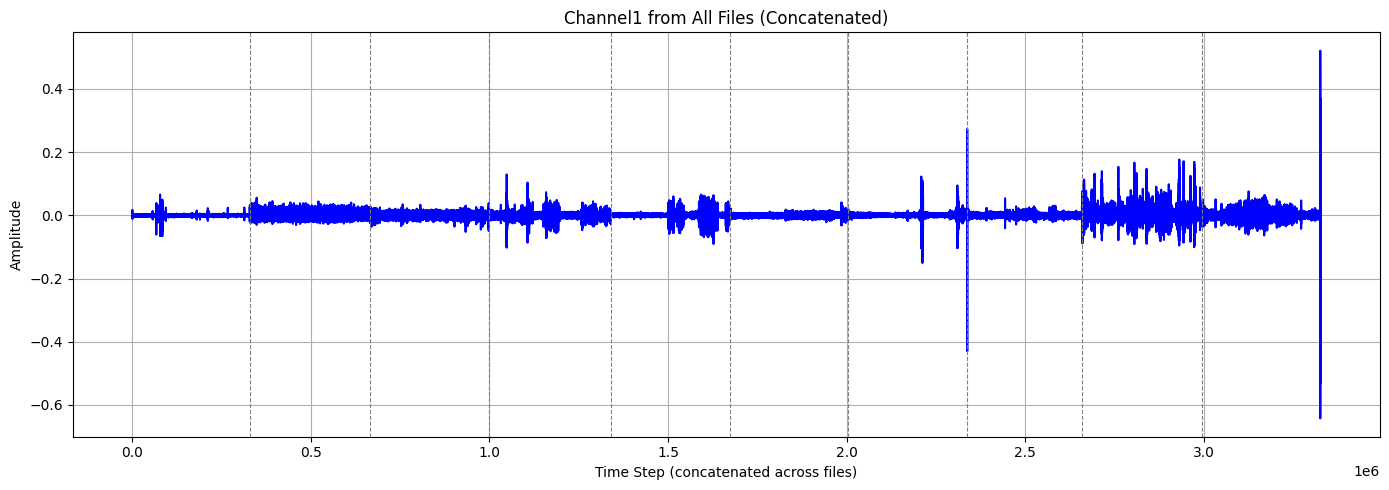

In [12]:
# Step 1: Concatenate Channel1 data from all files
channel1_concat = []
boundaries = []  # to mark where each file ends

for df in dataframes:
    channel1_concat.extend(df['Channel1'].values)
    boundaries.append(len(channel1_concat))  # save endpoint

# Step 2: Plot concatenated signal
plt.figure(figsize=(14, 5))
plt.plot(channel1_concat, color='blue')

# Optional: Add vertical lines to indicate file boundaries
for b in boundaries[:-1]:  # skip last one
    plt.axvline(x=b, color='gray', linestyle='--', linewidth=0.8)

plt.title("Channel1 from All Files (Concatenated)")
plt.xlabel("Time Step (concatenated across files)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

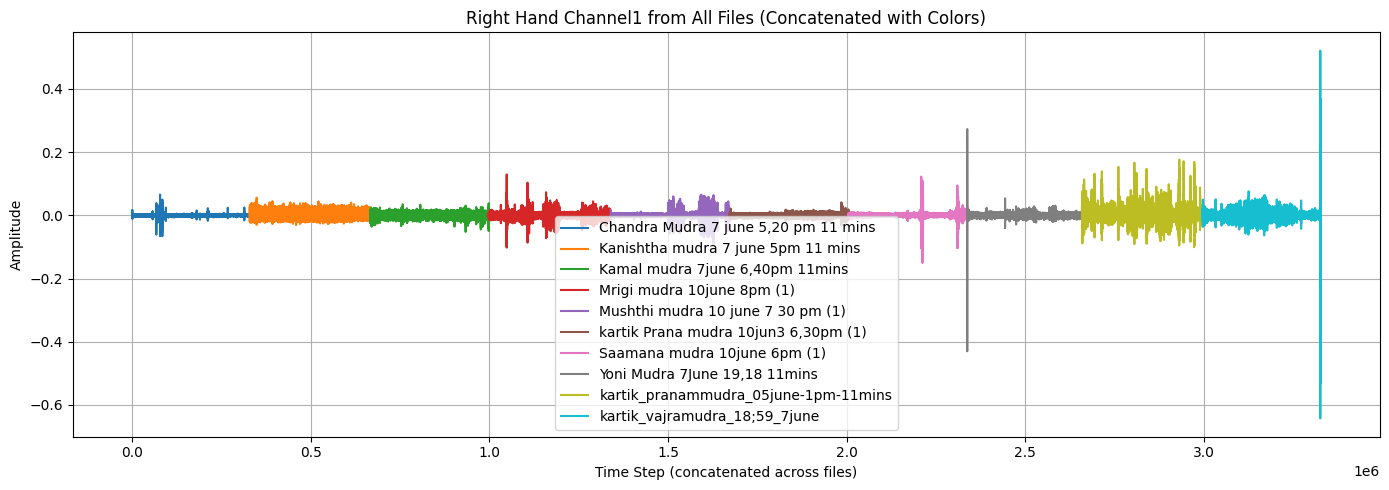

In [14]:

colors = cm.tab10(np.linspace(0, 1, len(dataframes)))

plt.figure(figsize=(14, 5))

start = 0
index = 0
for idx, (df, color) in enumerate(zip(dataframes, colors)):
    y = df['Channel1'].values
    x = np.arange(start, start + len(y))
    file_name = os.path.basename(file_paths[idx])
    label = file_name.replace(".csv", "").replace("Kartik", "").strip()  # clean label
    plt.plot(x, y, color=color, label=label)
    start += len(y)
    index = index + 1

plt.title("Right Hand Channel1 from All Files (Concatenated with Colors)")
plt.xlabel("Time Step (concatenated across files)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


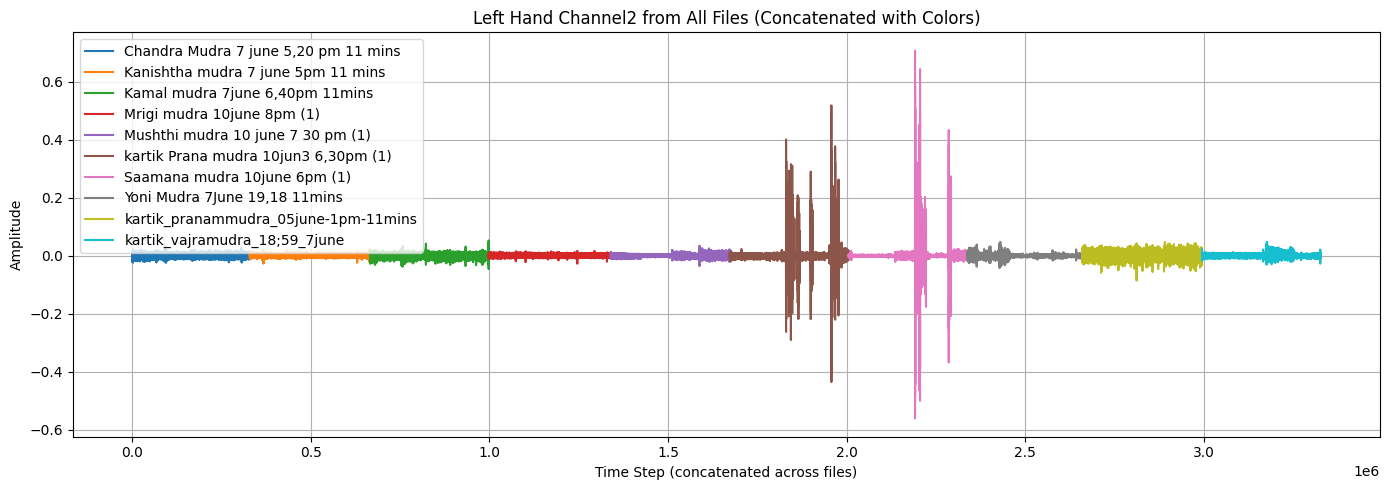

In [15]:

colors = cm.tab10(np.linspace(0, 1, len(dataframes)))

plt.figure(figsize=(14, 5))

start = 0
index = 0
for idx, (df, color) in enumerate(zip(dataframes, colors)):
    y = df['Channel2'].values
    x = np.arange(start, start + len(y))
    file_name = os.path.basename(file_paths[idx])
    label = file_name.replace(".csv", "").replace("Kartik", "").strip()  # clean label
    plt.plot(x, y, color=color, label=label)
    start += len(y)
    index = index + 1

plt.title("Left Hand Channel2 from All Files (Concatenated with Colors)")
plt.xlabel("Time Step (concatenated across files)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


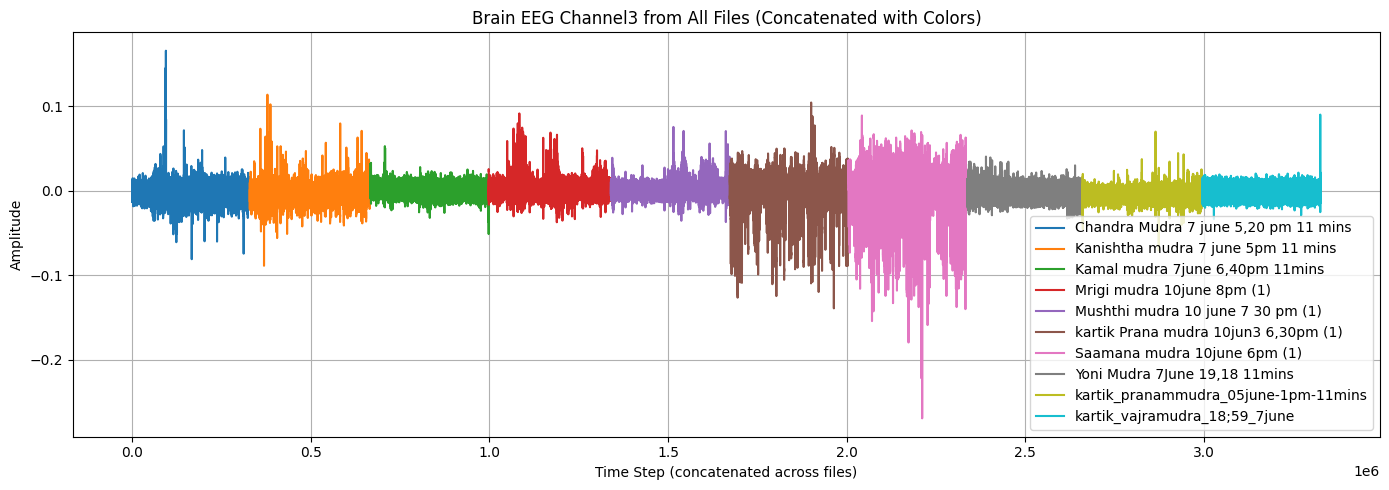

In [16]:

colors = cm.tab10(np.linspace(0, 1, len(dataframes)))

plt.figure(figsize=(14, 5))

start = 0
index = 0
for idx, (df, color) in enumerate(zip(dataframes, colors)):
    y = df['Channel3'].values
    x = np.arange(start, start + len(y))
    file_name = os.path.basename(file_paths[idx])
    label = file_name.replace(".csv", "").replace("Kartik", "").strip()  # clean label
    plt.plot(x, y, color=color, label=label)
    start += len(y)
    index = index + 1

plt.title("Brain EEG Channel3 from All Files (Concatenated with Colors)")
plt.xlabel("Time Step (concatenated across files)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
class EEGDataset2:
    def __init__(self, train_csv, seconds=0.500, fs=256, data_portion=1, normalize=True, isolated_channels=False):
        assert data_portion > 0.0 and data_portion <= 1, 'data_portion should be > 0 and <= 1'
        
        self.isolated_channels = isolated_channels
        self.normalize = normalize
        self.train_csv = train_csv
        self.seconds = seconds
        self.fs = fs
        self.data_portion = data_portion
    
    def get_data(self):
        df = pd.read_csv(self.train_csv)
        array_size = int(self.seconds * self.fs)
        # Dataset shape is: [data x channels]
        # we want shape: [segments x features]
        
        if self.normalize:
            df = (df - df.mean()) / df.std()
        
        if self.isolated_channels:
            channels = []
            for channel in df.columns[0:3]:
                isolated_channel = []
                for i in range(int(len(df) / array_size)):
                    isolated_channel.append(df[channel][i*array_size:(i+1)*array_size].to_numpy())
                channels.append(np.array(isolated_channel))
            return np.array(channels)
            
        dataset = []
        
        for channel in df.columns[0:3]:
            for i in range(int(len(df) / array_size)):
                dataset.append(df[channel][i*array_size:(i+1)*array_size].to_numpy())
                
        return np.array(dataset)

In [18]:
final_df.to_csv("/Users/kartikraj/Desktop/EEG project files/Kartik/final concatenated Kartik all.csv", index=False)
train_csv = './Kartik/final concatenated Kartik all.csv'
eegDataset = EEGDataset2(train_csv, seconds, fs, data_portion, normalize=True)

train_dataset = eegDataset.get_data()
train_dataset.shape

(77988, 128)

In [19]:

# Assuming train_dataset is a NumPy array
# Compute column-wise means, ignoring NaNs
col_mean = np.nanmean(train_dataset, axis=0)

# Find indices where NaNs are present
inds = np.where(np.isnan(train_dataset))

# Replace NaNs with the corresponding column mean
train_dataset[inds] = np.take(col_mean, inds[1])

# Now fit the model
clf = hbos.HBOS(n_bins=17, alpha=0.07, tol=0.5, contamination=0.15)
clf.fit(train_dataset)
train_dataset.shape

(77988, 128)

In [20]:

print("="*20)
print("TRAINING THE MODEL")

TRAINING THE MODEL


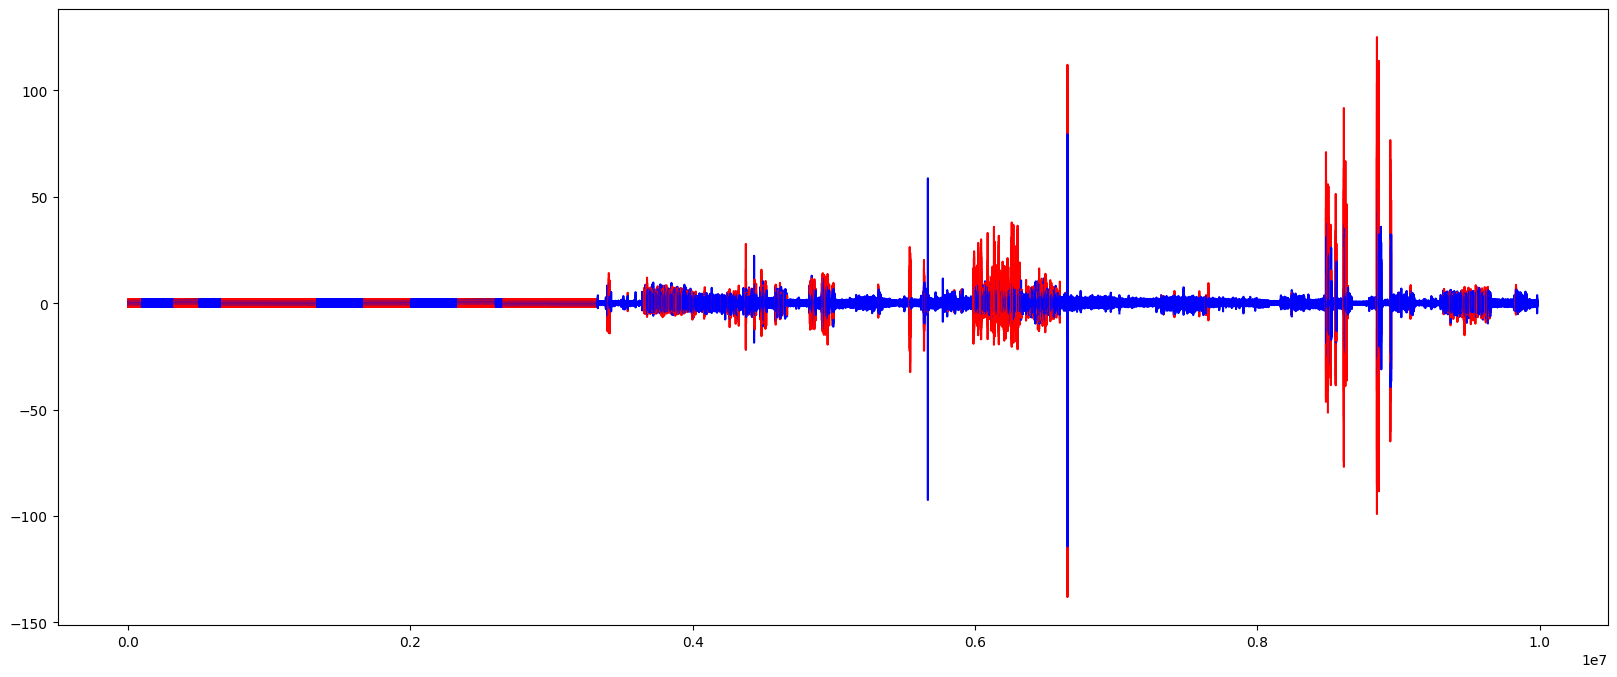

In [21]:
pred = clf.predict(train_dataset)

for i in range(len(pred)):
    plt.rcParams["figure.figsize"] = (20,8)
    
    if pred[i] == 1: plt.plot(range(128*i,128*(i+1)), train_dataset[i], color='red') #anamoly
    else: plt.plot(range(128*i,128*(i+1)), train_dataset[i], color='b')


#Here total values in x axis is 77988*128

In [62]:
# implementing models from now on
# implementing everything on raw data first

In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
#importing Libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
tf.keras.backend.clear_session()
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import datasets, tree, linear_model, svm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [23]:
# Load the CSV file (no headers)

# If your data has multiple columns:
# For example, column 0: EEG, columns 1 & 2: EMG
emg1_data = final_df['Channel1'].values
emg2_data = final_df['Channel2'].values
eeg_data = final_df['Channel3'].values

In [24]:
#analysing channel1 data first and extracting features

In [25]:
final_df.head()

,Counter,Channel1,Channel2,Channel3,label
0,132,-0.006355,0.007076,-0.005532,0
1,133,0.005500,0.001964,-0.002671,0
2,134,0.013204,0.001348,0.001666,0
3,135,0.012575,-0.000566,0.004872,0
4,136,0.004676,-0.002999,0.006438,0


In [26]:
final_df.tail()

,Counter,Channel1,Channel2,Channel3,label
3327495,61,-0.002645,0.000263,0.008473,9
3327496,62,-0.003387,0.003427,0.008375,9
3327497,63,0.000248,0.002039,0.005053,9
3327498,64,0.001785,0.001773,0.001596,9
3327499,65,0.000494,-0.001661,-0.001349,9


In [27]:
m0 = final_df.loc[final_df["label"] == 0]
sample_m0 = m0.loc[0, 'Channel1':'Channel3'] if 0 in m0.index else None

m1 = final_df.loc[final_df["label"] == 1]
sample_m1 = m1.loc[1, 'Channel1':'Channel3'] if 1 in m1.index else None

m2 = final_df.loc[final_df["label"] == 2]
sample_m2 = m2.loc[2, 'Channel1':'Channel3'] if 2 in m2.index else None

m3 = final_df.loc[final_df["label"] == 3]
sample_m3 = m3.loc[3, 'Channel1':'Channel3'] if 3 in m3.index else None

m4 = final_df.loc[final_df["label"] == 4]
sample_m4 = m4.loc[4, 'Channel1':'Channel3'] if 4 in m4.index else None

m5 = final_df.loc[final_df["label"] == 5]
sample_m5 = m5.loc[5, 'Channel1':'Channel3'] if 5 in m5.index else None

m6 = final_df.loc[final_df["label"] == 6]
sample_m6 = m6.loc[6, 'Channel1':'Channel3'] if 6 in m6.index else None

m7 = final_df.loc[final_df["label"] == 7]
sample_m7 = m7.loc[7, 'Channel1':'Channel3'] if 7 in m7.index else None

m8 = final_df.loc[final_df["label"] == 8]
sample_m8 = m8.loc[8, 'Channel1':'Channel3'] if 8 in m8.index else None

m9 = final_df.loc[final_df["label"] == 9]
sample_m9 = m9.loc[9, 'Channel1':'Channel3'] if 9 in m9.index else None


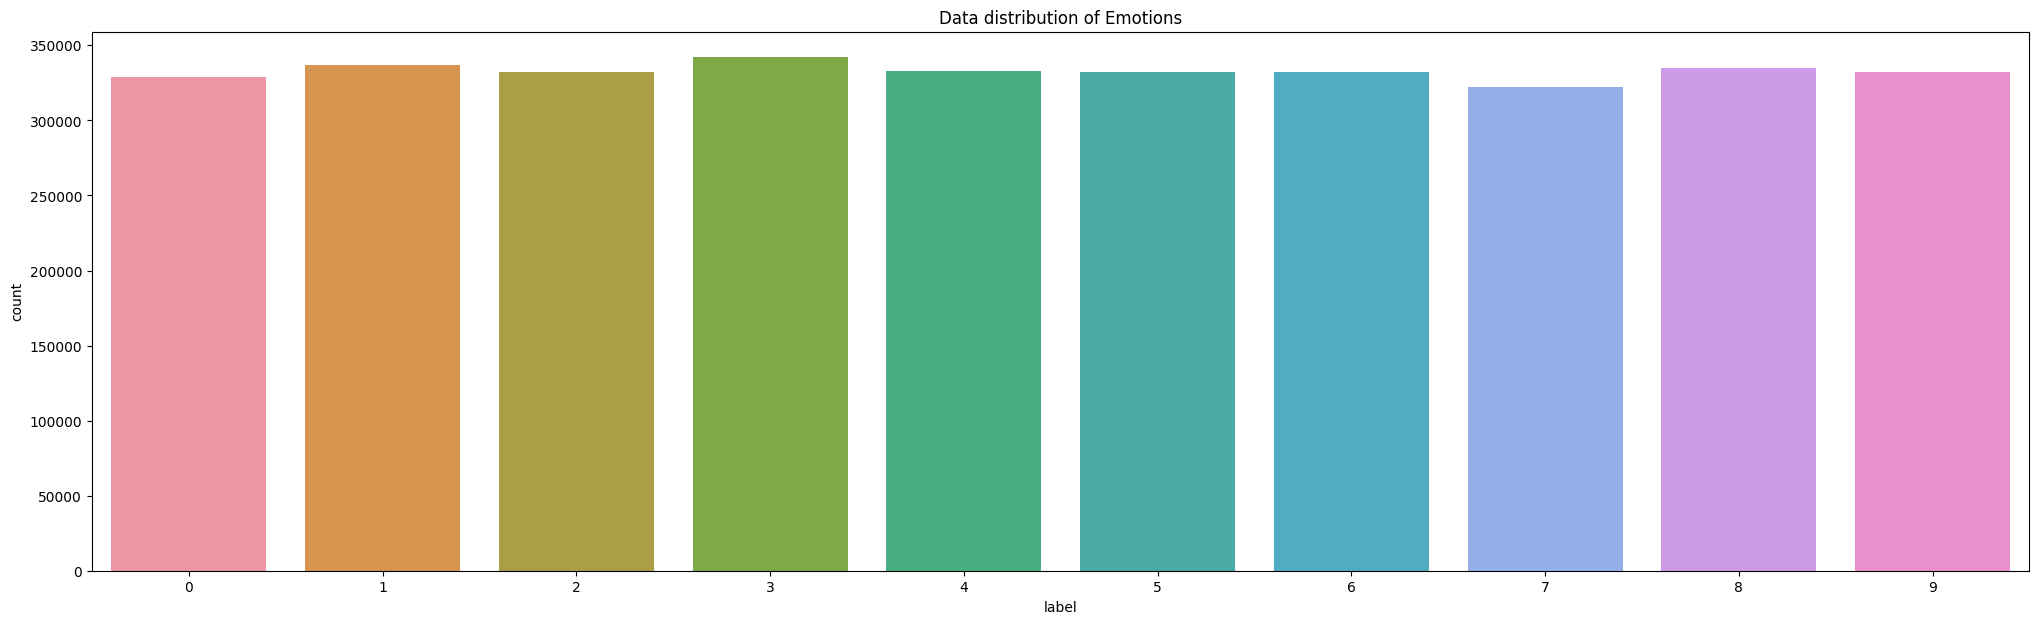

In [28]:
#plottintg Dataframe distribution
plt.figure(figsize=(25,7))
plt.title("Data distribution of Emotions")
plt.style.use('fivethirtyeight')
sns.countplot(x='label', data=final_df)
plt.show()


In [33]:
#above basically, we have all different labels for all different mudras

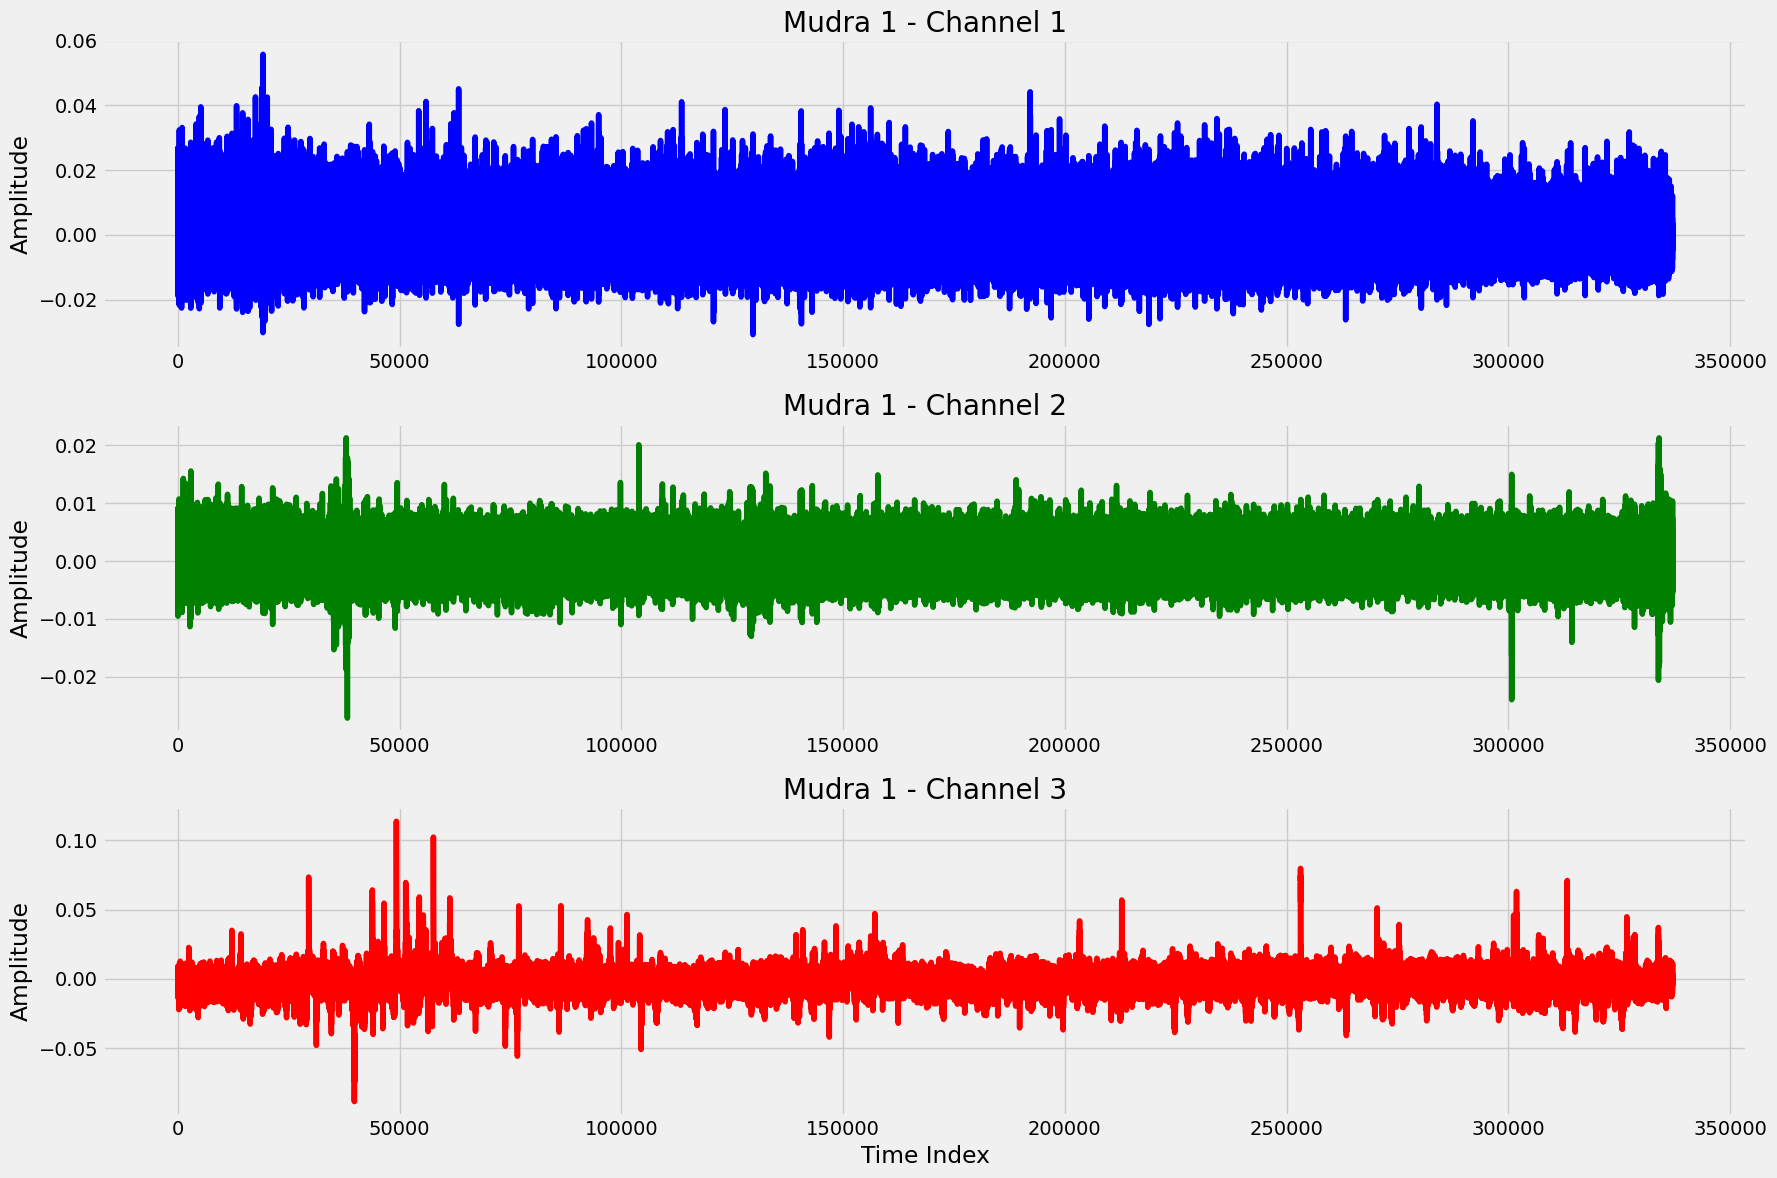

'For mudra1, channel1 lies from -0.02 to 0.04\nFor mudra1, channel1 lies from -0.01 to 0.01\nFor mudra1, channel1 lies from -0.05 to 0.05'

In [29]:
if m1 is not None and not m1.empty:
    plt.figure(figsize=(18, 12))

    # Channel 1
    plt.subplot(3, 1, 1)
    plt.plot(range(len(m1)), m1['Channel1'], color='blue')
    plt.title("Mudra 1 - Channel 1")
    plt.ylabel("Amplitude")

    # Channel 2
    plt.subplot(3, 1, 2)
    plt.plot(range(len(m1)), m1['Channel2'], color='green')
    plt.title("Mudra 1 - Channel 2")
    plt.ylabel("Amplitude")

    # Channel 3
    plt.subplot(3, 1, 3)
    plt.plot(range(len(m1)), m1['Channel3'], color='red')
    plt.title("Mudra 1 - Channel 3")
    plt.ylabel("Amplitude")
    plt.xlabel("Time Index")

    plt.tight_layout()
    plt.show()
else:
    print("No data found for label == 1")


'''For mudra1, channel1 lies from -0.02 to 0.04
For mudra1, channel1 lies from -0.01 to 0.01
For mudra1, channel1 lies from -0.05 to 0.05'''

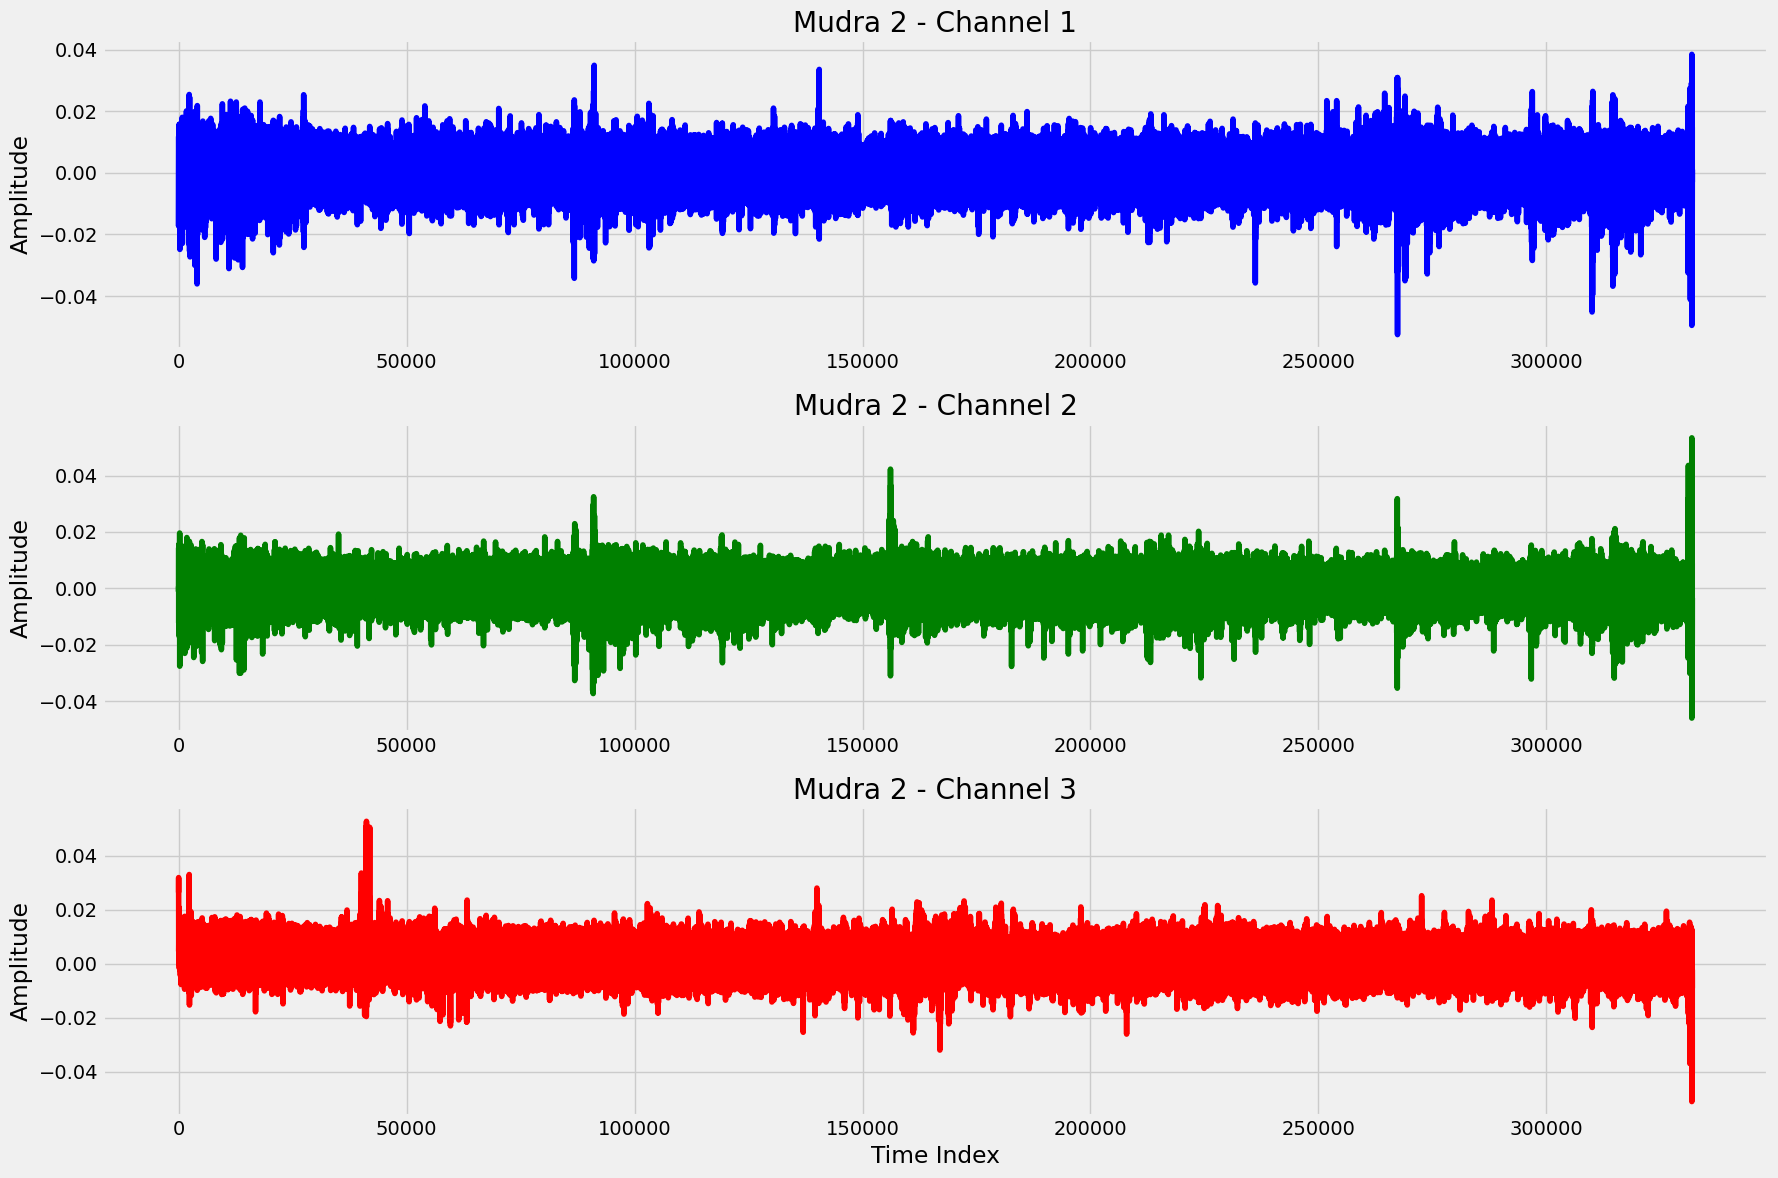

'For mudra1, channel1 lies from -0.02 to 0.02\nFor mudra1, channel1 lies from -0.02 to 0.02\nFor mudra1, channel1 lies from -0.02 to 0.02'

In [36]:
if m2 is not None and not m2.empty:
    plt.figure(figsize=(18, 12))

    # Channel 1
    plt.subplot(3, 1, 1)
    plt.plot(range(len(m2)), m2['Channel1'], color='blue')
    plt.title("Mudra 2 - Channel 1")
    plt.ylabel("Amplitude")

    # Channel 2
    plt.subplot(3, 1, 2)
    plt.plot(range(len(m2)), m2['Channel2'], color='green')
    plt.title("Mudra 2 - Channel 2")
    plt.ylabel("Amplitude")

    # Channel 3
    plt.subplot(3, 1, 3)
    plt.plot(range(len(m2)), m2['Channel3'], color='red')
    plt.title("Mudra 2 - Channel 3")
    plt.ylabel("Amplitude")
    plt.xlabel("Time Index")

    plt.tight_layout()
    plt.show()
else:
    print("No data found for label == 1")


'''For mudra1, channel1 lies from -0.02 to 0.02
For mudra1, channel1 lies from -0.02 to 0.02
For mudra1, channel1 lies from -0.02 to 0.02'''

In [44]:
def Transform_data(data):
    data_encoded = data
    #getting brain signals into x variable
    x=data_encoded.drop(["Class",]  ,axis=1)
    #getting labels into y variable
    y = data_encoded.loc[:,'Class'].values
    scaler = StandardScaler()
    #scaling Brain Signals
    scaler.fit(x)
    X = scaler.transform(x)
    #One hot encoding Labels 
    Y = to_categorical(y)
    return X,Y

In [45]:
features_enoch = pd.read_csv("./extracted_features2.csv")

In [46]:
X,Y = Transform_data(features_enoch)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)


In [40]:
print(np.unique(y_train))

[0. 1.]


In [47]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [48]:
x_train.shape[1]

30

In [49]:
x_train[0]
#This contain channel 1 2 and 3 for each row

array([ 0.17578481,  0.71998652, -0.93637324,  0.18982973,  0.57622019,
       -0.03695263, -0.0473857 , -0.07813716,  0.55834436,  0.09598678,
        1.01694001,  1.7174593 , -1.3995774 ,  1.19688191,  1.34004806,
       -0.01686066, -0.03120172, -0.00848737,  0.41081838,  0.77744865,
       -0.54523965, -0.34205233, -0.34771893, -0.84157231, -0.27931672,
       -0.1412564 ,  0.17107527, -0.17364373, -0.07442096, -0.49461481])

In [51]:
from tensorflow.keras.layers import Lambda

def create_model():
    # Input layer
    inputs = tf.keras.Input(shape=(x_train.shape[1],))

    # Expand dims using a Lambda layer
    expand_dims = Lambda(lambda x: tf.expand_dims(x, axis=2))(inputs)

    # GRU Layer
    gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)

    # Flatten Layer
    flatten = tf.keras.layers.Flatten()(gru)

    # Output Layer
    outputs = tf.keras.layers.Dense(10, activation='softmax')(flatten)

    # Model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.summary()
    return model


In [52]:
#cretaing model
lstmmodel = create_model()
#Compiling model 
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
lstmmodel.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 30, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 30, 256)        │       198,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7680)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        76,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 275,722 (1.05 MB)

 Trainable params: 275,722 (1.05 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
import numpy as np
print(np.isnan(x_train).sum(), np.isinf(x_train).sum())
print(np.isnan(y_train).sum(), np.isinf(y_train).sum())

0 0
0 0


In [54]:
!pip install torch
import torch
# Check for NaNs in inputs
assert not torch.isnan(inputs).any(), "NaN in inputs"
assert not torch.isnan(labels).any(), "NaN in labels"

# Log gradients
for name, param in model.named_parameters():
    if param.grad is not None:
        print(f"{name}: grad max {param.grad.max()}, min {param.grad.min()}")

# Clip gradients
torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

NameError: name 'inputs' is not defined

In [55]:
#Training and Evaluting model
history = lstmmodel.fit(x_train, y_train, epochs = 10, validation_split=0.1)
loss, acc = lstmmodel.evaluate(x_test, y_test)

Epoch 1/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.4681 - loss: 1.8042 - val_accuracy: 0.6724 - val_loss: 1.0453
Epoch 2/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.7214 - loss: 0.8831 - val_accuracy: 0.7952 - val_loss: 0.6767
Epoch 3/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.8151 - loss: 0.5777 - val_accuracy: 0.8276 - val_loss: 0.5458
Epoch 4/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.8508 - loss: 0.4637 - val_accuracy: 0.8441 - val_loss: 0.4731
Epoch 5/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.8722 - loss: 0.3959 - val_accuracy: 0.8697 - val_loss: 0.4041
Epoch 6/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.8792 - loss: 0.3604 - val_accuracy: 0.8754 - val_loss: 0.3757
Epoch 7/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.8970 - loss: 0.3070 - val_accuracy: 0.8760 - val_loss: 0.3482
Epoch 8/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.8972 - loss: 0.3033 - 

In [56]:
pred  = lstmmodel.predict(x_test)

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [57]:
#Loss and Accuracy of model on Testiong Dataset 
print(f"Loss on testing: {loss*100}",f"\nAccuracy on Training: {acc*100}")


Loss on testing: 27.099618315696716 
Accuracy on Training: 90.85115790367126


In [69]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(features_enoch.Class.unique()))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [70]:
#after getting prediction checking maximum score prediction to claim which emotion this brain signal belongs to
pred1 = np.argmax(pred,axis=1)

In [71]:
#inversing the one hot encoding
y_test1 =   np.argmax(y_test,axis=1)

In [72]:
#printing first 10 Actual and predicted outputs of Test brain signals 
print("Predicted:  ",pred1[:10])
print("\n")
print("Actual: ",y_test1[:10])

Predicted:   [2 6 3 1 7 8 6 8 4 5]


Actual:  [2 6 3 1 7 8 6 2 4 5]


Confusion matrix, without normalization
[[454  10   1  27   2   0   2   0   0  18]
 [  1 400  19  29   2   3   0   0   0  21]
 [  0   9 444   0   1   2   0   0   4   2]
 [  5  35   5 305   1   0   1   0  17   5]
 [  1   3   3   2 284   3   0   2   7   8]
 [  0   2   0   0   0 278   0   0   0   0]
 [  1   1   0   0   0   0 506   0   0   1]
 [  1   0   0   4   0   0   0 494  16   0]
 [  3   1   6  15   1   0   0   6 432  12]
 [ 12  24  26   8   2   1   0   0   8 395]]


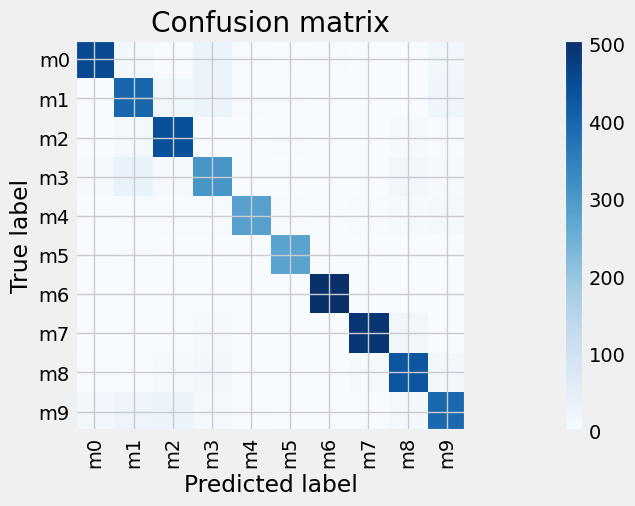

In [73]:
#Plotting Confusion matrix of Lstm Model
cm = confusion_matrix(y_test1, pred1)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.rcParams["figure.figsize"]=(20,5)
plt.figure()
plot_confusion_matrix(cm,["m0","m1","m2","m3","m4","m5","m6","m7","m8","m9"])

In [74]:
names1 = ["m0","m1","m2","m3","m4","m5","m6","m7","m8","m9"]



*		Classification Report GNB:
               precision    recall  f1-score   support

           0       0.25      0.82      0.39       514
           1       0.85      0.31      0.46       475
           2       0.91      0.50      0.65       462
           3       0.61      0.76      0.68       374
           4       0.79      0.52      0.63       313
           5       0.89      0.88      0.88       280
           6       0.91      0.42      0.57       509
           7       0.89      0.77      0.82       515
           8       0.91      0.67      0.77       476
           9       0.32      0.21      0.25       476

    accuracy                           0.57      4394
   macro avg       0.73      0.59      0.61      4394
weighted avg       0.72      0.57      0.60      4394


*		Classification Report SVM:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       514
           1       0.85      0.90      0.87       475
           2  

/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



*		Classification Report LR:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       514
           1       0.81      0.61      0.70       475
           2       0.93      0.96      0.94       462
           3       0.68      0.90      0.77       374
           4       0.93      0.92      0.92       313
           5       0.97      0.98      0.97       280
           6       0.99      0.99      0.99       509
           7       0.95      0.91      0.93       515
           8       0.89      0.92      0.90       476
           9       0.85      0.81      0.83       476

    accuracy                           0.89      4394
   macro avg       0.89      0.89      0.89      4394
weighted avg       0.89      0.89      0.89      4394


*		Classification Report Deccsion Tree:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       514
           1       0.87      0.88      0.88       475
     

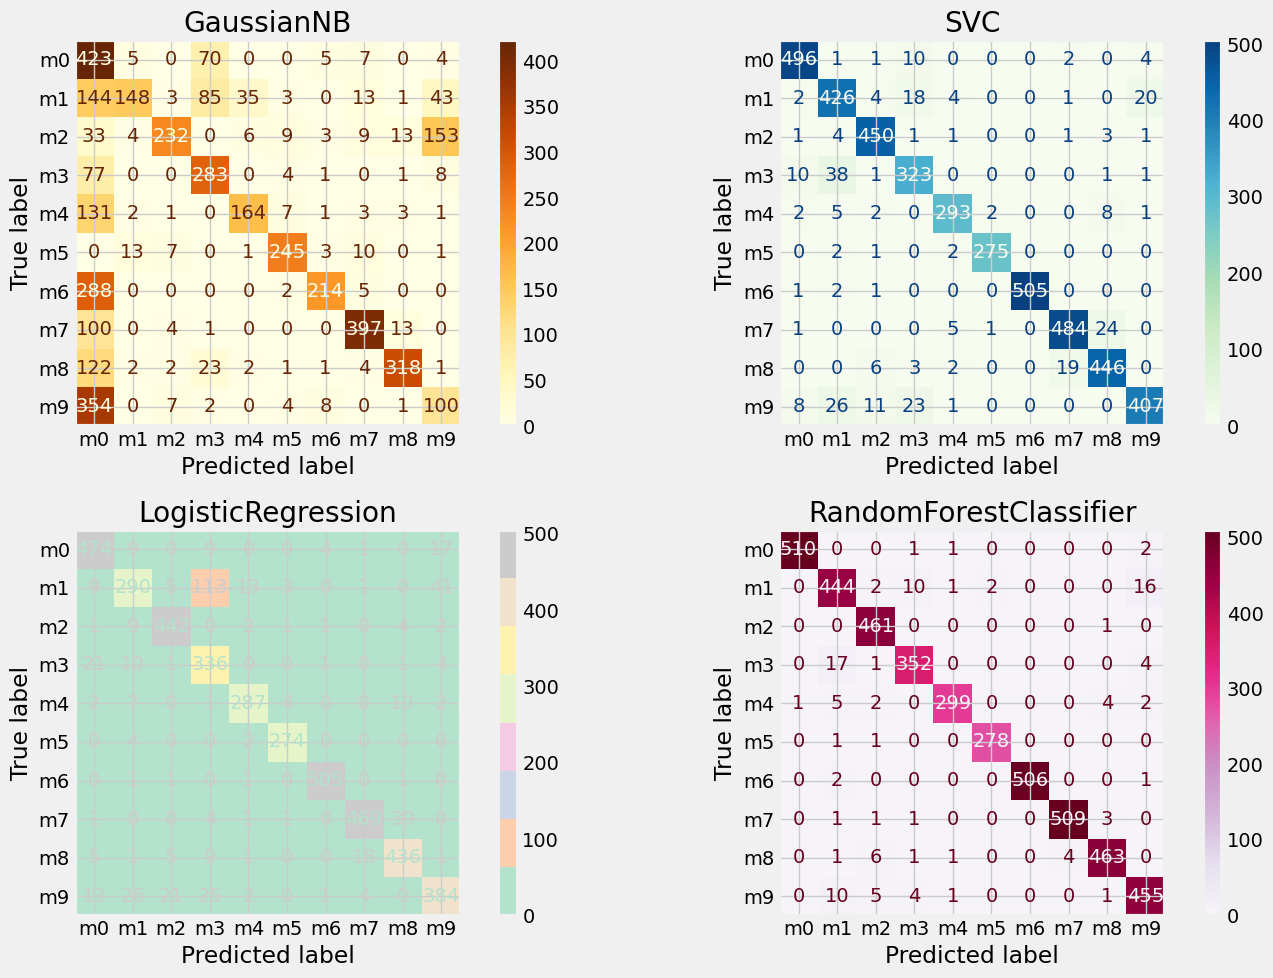

In [76]:
from sklearn.naive_bayes import GaussianNB
from sklearn import svm, linear_model, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Training and classification reports (your original logic)
Classifier_gnb = GaussianNB().fit(x_train, np.argmax(y_train, axis=1))
pred_gnb = Classifier_gnb.predict(x_test)
print('\n*\t\tClassification Report GNB:\n', classification_report(np.argmax(y_test, axis=1), pred_gnb))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test, axis=1), pred_gnb)

Classifier_svm = svm.SVC(kernel='linear').fit(x_train, np.argmax(y_train, axis=1))
pred_svm = Classifier_svm.predict(x_test)
print('\n*\t\tClassification Report SVM:\n', classification_report(np.argmax(y_test, axis=1), pred_svm))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test, axis=1), pred_svm)

Classifier_LR = linear_model.LogisticRegression(solver='liblinear', C=75).fit(x_train, np.argmax(y_train, axis=1))
pred_LR = Classifier_LR.predict(x_test)
print('\n*\t\tClassification Report LR:\n', classification_report(np.argmax(y_test, axis=1), pred_LR))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test, axis=1), pred_LR)

Classifier_dt = tree.DecisionTreeClassifier().fit(x_train, np.argmax(y_train, axis=1))
pred_dt = Classifier_dt.predict(x_test)
print('\n*\t\tClassification Report Deccsion Tree:\n', classification_report(np.argmax(y_test, axis=1), pred_dt))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test, axis=1), pred_dt)

Classifier_forest = RandomForestClassifier(n_estimators=50, random_state=0).fit(x_train, np.argmax(y_train, axis=1))
pred_fr = Classifier_forest.predict(x_test)
print('\n*\t\tClassification Report Random Forest:\n', classification_report(np.argmax(y_test, axis=1), pred_fr))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test, axis=1), pred_fr)

# Plotting confusion matrices
classifiers = [
    Classifier_gnb,
    Classifier_svm,
    Classifier_LR,
    Classifier_forest
]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
colors = ['YlOrBr', 'GnBu', 'Pastel2', 'PuRd']
for cls, ax, c in zip(classifiers, axes.flatten(), colors):
    ConfusionMatrixDisplay.from_estimator(
        cls,
        x_test,
        np.argmax(y_test, axis=1),
        ax=ax,
        cmap=c,
        display_labels=names1
    )
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()
plt.show()


In [77]:
#Classification Report of Lstm model
print('\n*\t\tClassification Report OF Brain Waves LSTM:\n', classification_report(np.argmax(y_test,axis=1), np.argmax(lstmmodel.predict(x_test),axis=1) ))

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

*		Classification Report OF Brain Waves LSTM:
               precision    recall  f1-score   support

           0       0.95      0.88      0.92       514
           1       0.82      0.84      0.83       475
           2       0.88      0.96      0.92       462
           3       0.78      0.82      0.80       374
           4       0.97      0.91      0.94       313
           5       0.97      0.99      0.98       280
           6       0.99      0.99      0.99       509
           7       0.98      0.96      0.97       515
           8       0.89      0.91      0.90       476
           9       0.85      0.83      0.84       476

    accuracy                           0.91      4394
   macro avg       0.91      0.91      0.91      4394
weighted avg       0.91      0.91      0.91      4394



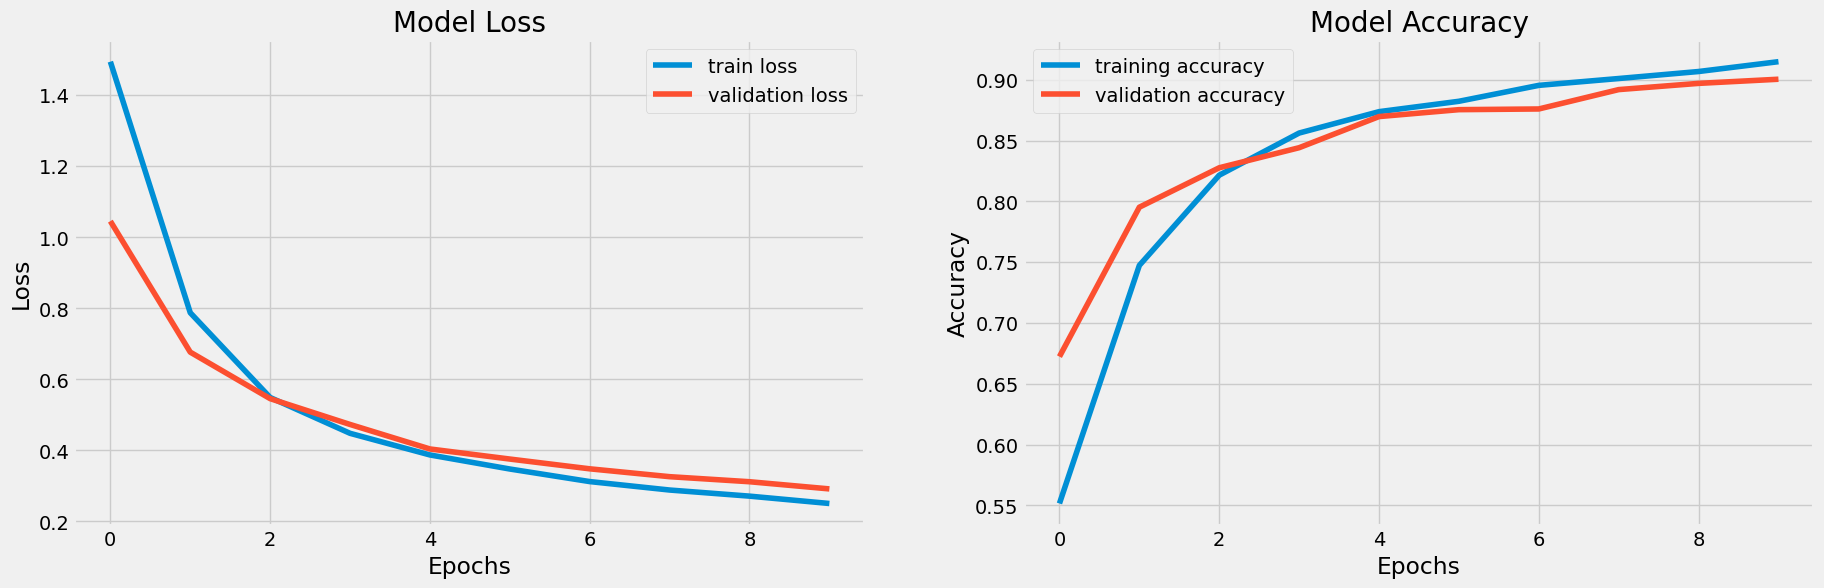

In [78]:
#Plotting Graph of Lstm model Training, Loss and Accuracy
plt.style.use("fivethirtyeight")
plt.figure(figsize = (20,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss",fontsize=20)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train loss', 'validation loss'], loc ='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy",fontsize=20)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['training accuracy', 'validation accuracy'], loc ='best')
plt.show()